In [1]:
import pandas as pd
import requests 
import gmaps 
import os 
import matplotlib.pyplot as plt
import numpy as np
from config import key_dict

'maps' in key_dict
maps_key = key_dict['maps']

In [2]:
us_counties_df = pd.read_csv('Resources/covid_us_county.csv')
us_counties_df

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0
...,...,...,...,...,...,...,...,...,...
1406135,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-13,631,WY,5
1406136,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-14,631,WY,5
1406137,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-15,631,WY,5
1406138,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-16,631,WY,5


In [3]:
counties_recent_df = us_counties_df.loc[us_counties_df['date'] == '2021-03-17']
counties_recent_df

,fips,county,state,lat,long,date,cases,state_code,deaths
420,1001.0,Autauga,Alabama,32.539527,-86.644082,2021-03-17,6483,AL,96
841,1003.0,Baldwin,Alabama,30.727750,-87.722071,2021-03-17,20263,AL,295
1262,1005.0,Barbour,Alabama,31.868263,-85.387129,2021-03-17,2199,AL,54
1683,1007.0,Bibb,Alabama,32.996421,-87.125115,2021-03-17,2512,AL,58
2104,1009.0,Blount,Alabama,33.982109,-86.567906,2021-03-17,6371,AL,129
...,...,...,...,...,...,...,...,...,...
1404455,56039.0,Teton,Wyoming,43.935225,-110.589080,2021-03-17,3484,WY,9
1404876,56041.0,Uinta,Wyoming,41.287818,-110.547578,2021-03-17,2101,WY,12
1405297,90056.0,Unassigned,Wyoming,0.000000,0.000000,2021-03-17,0,WY,0
1405718,56043.0,Washakie,Wyoming,43.904516,-107.680187,2021-03-17,889,WY,26


In [4]:
find_zeros_df = counties_recent_df.loc[counties_recent_df['cases'] == 0]
find_zeros_df

,fips,county,state,lat,long,date,cases,state_code,deaths
22312,80001.0,Out of AL,Alabama,0.000000,0.000000,2021-03-17,0,AL,0
27364,90001.0,Unassigned,Alabama,0.000000,0.000000,2021-03-17,0,AL,0
31153,2060.0,Bristol Bay,Alaska,58.745140,-156.701064,2021-03-17,0,AK,0
33679,2105.0,Hoonah-Angoon,Alaska,58.293074,-135.642442,2021-03-17,0,AK,0
37889,80002.0,Out of AK,Alaska,0.000000,0.000000,2021-03-17,0,AK,0
...,...,...,...,...,...,...,...,...,...
1361513,90054.0,Unassigned,West Virginia,0.000000,0.000000,2021-03-17,0,WV,0
1383405,80055.0,Out of WI,Wisconsin,0.000000,0.000000,2021-03-17,0,WI,0
1391404,90055.0,Unassigned,Wisconsin,0.000000,0.000000,2021-03-17,0,WI,0
1401929,80056.0,Out of WY,Wyoming,0.000000,0.000000,2021-03-17,0,WY,0


In [5]:
zero_cases_array = find_zeros_df.index.values

In [6]:
nozeros_counties_df = us_counties_df.drop(zero_cases_array)
nozeros_counties_df

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0
...,...,...,...,...,...,...,...,...,...
1406135,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-13,631,WY,5
1406136,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-14,631,WY,5
1406137,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-15,631,WY,5
1406138,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-03-16,631,WY,5


In [7]:
nozeros_recent_counties_df = counties_recent_df.drop(zero_cases_array)
nozeros_recent_counties_df

,fips,county,state,lat,long,date,cases,state_code,deaths
420,1001.0,Autauga,Alabama,32.539527,-86.644082,2021-03-17,6483,AL,96
841,1003.0,Baldwin,Alabama,30.727750,-87.722071,2021-03-17,20263,AL,295
1262,1005.0,Barbour,Alabama,31.868263,-85.387129,2021-03-17,2199,AL,54
1683,1007.0,Bibb,Alabama,32.996421,-87.125115,2021-03-17,2512,AL,58
2104,1009.0,Blount,Alabama,33.982109,-86.567906,2021-03-17,6371,AL,129
...,...,...,...,...,...,...,...,...,...
1404034,56037.0,Sweetwater,Wyoming,41.659439,-108.882788,2021-03-17,3909,WY,36
1404455,56039.0,Teton,Wyoming,43.935225,-110.589080,2021-03-17,3484,WY,9
1404876,56041.0,Uinta,Wyoming,41.287818,-110.547578,2021-03-17,2101,WY,12
1405718,56043.0,Washakie,Wyoming,43.904516,-107.680187,2021-03-17,889,WY,26


In [8]:
testdf = nozeros_recent_counties_df.loc[nozeros_recent_counties_df['state'] == 'District of Columbia']
testdf

,fips,county,state,lat,long,date,cases,state_code,deaths
142297,11001.0,District of Columbia,District of Columbia,38.904178,-77.01656,2021-03-17,42811,NaN,1044


In [9]:
nozeros_recent_counties_df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
len(nozeros_recent_counties_df.state.unique())

57

In [11]:
clean_recent_counties_df = nozeros_recent_counties_df.dropna(how="any")
#clean_recent_counties_df = nozeros_recent_counties_df.fillna("", inplace=False)

In [12]:
len(clean_recent_counties_df.state.unique())

50

# MAP

In [13]:
# gmaps.configure(maps_key)

In [14]:
# locations = clean_recent_counties_df[['lat', 'long']]
# counties_cases = clean_recent_counties_df['cases'].astype(float)

In [15]:
# counties_cases.max()

In [16]:
# heatfig = gmaps.figure()

# heat_layer = gmaps.heatmap_layer(locations, weights = counties_cases,
#                                  dissipating= False, max_intensity = counties_cases.max(),
#                                  point_radius = 500)

# heatfig.add_layer(heat_layer)

# heatfig

In [17]:
# heat_layer.point_radius = 30
# heat_layer.dissipating = True

In [18]:
clean_recent_counties_df.columns

Index(['fips', 'county', 'state', 'lat', 'long', 'date', 'cases', 'state_code',
       'deaths'],
      dtype='object')

In [19]:
def getstatedf (statename):
    df = nozeros_counties_df.loc[nozeros_counties_df['state'] == statename]
    return df 

In [20]:
all_of_cali_df = getstatedf('California')
all_of_texas_df = getstatedf('Texas')
all_of_florida_df = getstatedf('Florida')
all_of_newyork_df = getstatedf('New York')
all_of_illinois_df = getstatedf('Illinois')
all_of_georgia_df = getstatedf('Georgia')
all_of_ohio_df = getstatedf('Ohio')



In [21]:
def casessumeachmonth (dfname):  
    statecases = []
    # For Funciton jan = state.loc[state['date'] == '2020-01-25']
    
    jan = dfname.loc[dfname['date'] == '2020-01-25']
    jansum = jan['cases'].sum()
    statecases.append(jansum)

    feb = dfname.loc[dfname['date'] == '2020-02-25']
    febsum = feb['cases'].sum()
    statecases.append(febsum)

    mar = dfname.loc[dfname['date'] == '2020-03-25']
    marsum = mar['cases'].sum()
    statecases.append(marsum)

    apr = dfname.loc[dfname['date'] == '2020-04-25']
    aprsum = apr['cases'].sum()
    statecases.append(aprsum)

    may = dfname.loc[dfname['date'] == '2020-05-25']
    maysum = may['cases'].sum()
    statecases.append(maysum)

    jun = dfname.loc[dfname['date'] == '2020-06-25']
    junsum = jun['cases'].sum()
    statecases.append(junsum)

    jul = dfname.loc[dfname['date'] == '2020-07-25']
    julsum = jul['cases'].sum()
    statecases.append(julsum)

    aug = dfname.loc[dfname['date'] == '2020-08-25']
    augsum = aug['cases'].sum()
    statecases.append(augsum)

    sep = dfname.loc[dfname['date'] == '2020-09-25']
    sepsum = sep['cases'].sum()
    statecases.append(sepsum)

    octo = dfname.loc[dfname['date'] == '2020-10-25']
    octosum = octo['cases'].sum()
    statecases.append(octosum)

    nov = dfname.loc[dfname['date'] == '2020-11-25']
    novsum = nov['cases'].sum()
    statecases.append(novsum)

    dec = dfname.loc[dfname['date'] == '2020-12-25']
    decsum = dec['cases'].sum()
    statecases.append(decsum)

    jan21 = dfname.loc[dfname['date'] == '2021-01-25']
    jan21sum = jan21['cases'].sum()
    statecases.append(jan21sum)

    return statecases 

In [42]:
cali_array = casessumeachmonth(all_of_cali_df)
texas_array = casessumeachmonth(all_of_texas_df)
florida_array = casessumeachmonth(all_of_florida_df)
newyork_array = casessumeachmonth(all_of_newyork_df)
illinois_array = casessumeachmonth(all_of_illinois_df)
georgia_array = casessumeachmonth(all_of_georgia_df)
ohio_array = casessumeachmonth(all_of_ohio_df)

In [45]:
top7state_array = []
top7state_array.append(cali_array)
top7state_array.append(texas_array)
top7state_array.append(newyork_array)
top7state_array.append(florida_array)
top7state_array.append(illinois_array)
top7state_array.append(georgia_array)
top7state_array.append(ohio_array)
# top7state_array

In [24]:
all_of_texas_df

,fips,county,state,lat,long,date,cases,state_code,deaths
1135858,48001.0,Anderson,Texas,31.815347,-95.653548,2020-01-22,0,TX,0
1135859,48001.0,Anderson,Texas,31.815347,-95.653548,2020-01-23,0,TX,0
1135860,48001.0,Anderson,Texas,31.815347,-95.653548,2020-01-24,0,TX,0
1135861,48001.0,Anderson,Texas,31.815347,-95.653548,2020-01-25,0,TX,0
1135862,48001.0,Anderson,Texas,31.815347,-95.653548,2020-01-26,0,TX,0
...,...,...,...,...,...,...,...,...,...
1243629,48507.0,Zavala,Texas,28.866172,-99.760508,2021-03-13,1831,TX,39
1243630,48507.0,Zavala,Texas,28.866172,-99.760508,2021-03-14,1831,TX,39
1243631,48507.0,Zavala,Texas,28.866172,-99.760508,2021-03-15,1831,TX,39
1243632,48507.0,Zavala,Texas,28.866172,-99.760508,2021-03-16,1831,TX,40


In [25]:
all_of_cali = nozeros_counties_df.loc[nozeros_counties_df['state'] == 'California']
all_of_cali 

,fips,county,state,lat,long,date,cases,state_code,deaths
82095,6001.0,Alameda,California,37.646294,-121.892927,2020-01-22,0,CA,0
82096,6001.0,Alameda,California,37.646294,-121.892927,2020-01-23,0,CA,0
82097,6001.0,Alameda,California,37.646294,-121.892927,2020-01-24,0,CA,0
82098,6001.0,Alameda,California,37.646294,-121.892927,2020-01-25,0,CA,0
82099,6001.0,Alameda,California,37.646294,-121.892927,2020-01-26,0,CA,0
...,...,...,...,...,...,...,...,...,...
107350,6115.0,Yuba,California,39.262559,-121.353564,2021-03-13,5854,CA,42
107351,6115.0,Yuba,California,39.262559,-121.353564,2021-03-14,5854,CA,42
107352,6115.0,Yuba,California,39.262559,-121.353564,2021-03-15,5874,CA,42
107353,6115.0,Yuba,California,39.262559,-121.353564,2021-03-16,5888,CA,42


In [26]:
statecases = []
# For Funciton jan = state.loc[state['date'] == '2020-01-25']

jan = all_of_cali.loc[all_of_cali['date'] == '2020-01-25']
jansum = jan['cases'].sum()
statecases.append(jansum)

feb = all_of_cali.loc[all_of_cali['date'] == '2020-02-25']
febsum = feb['cases'].sum()
statecases.append(febsum)

mar = all_of_cali.loc[all_of_cali['date'] == '2020-03-25']
marsum = mar['cases'].sum()
statecases.append(marsum)

apr = all_of_cali.loc[all_of_cali['date'] == '2020-04-25']
aprsum = apr['cases'].sum()
statecases.append(aprsum)

may = all_of_cali.loc[all_of_cali['date'] == '2020-05-25']
maysum = may['cases'].sum()
statecases.append(maysum)

jun = all_of_cali.loc[all_of_cali['date'] == '2020-06-25']
junsum = jun['cases'].sum()
statecases.append(junsum)

jul = all_of_cali.loc[all_of_cali['date'] == '2020-07-25']
julsum = jul['cases'].sum()
statecases.append(julsum)

aug = all_of_cali.loc[all_of_cali['date'] == '2020-08-25']
augsum = aug['cases'].sum()
statecases.append(augsum)

sep = all_of_cali.loc[all_of_cali['date'] == '2020-09-25']
sepsum = sep['cases'].sum()
statecases.append(sepsum)

octo = all_of_cali.loc[all_of_cali['date'] == '2020-10-25']
octosum = octo['cases'].sum()
statecases.append(octosum)

nov = all_of_cali.loc[all_of_cali['date'] == '2020-11-25']
novsum = nov['cases'].sum()
statecases.append(novsum)

dec = all_of_cali.loc[all_of_cali['date'] == '2020-12-25']
decsum = dec['cases'].sum()
statecases.append(decsum)

jan21 = all_of_cali.loc[all_of_cali['date'] == '2021-01-25']
jan21sum = jan21['cases'].sum()
statecases.append(jan21sum)

print(statecases)

[0, 10, 3009, 42771, 97152, 207480, 452831, 683935, 806526, 910407, 1173797, 2085231, 3213222]


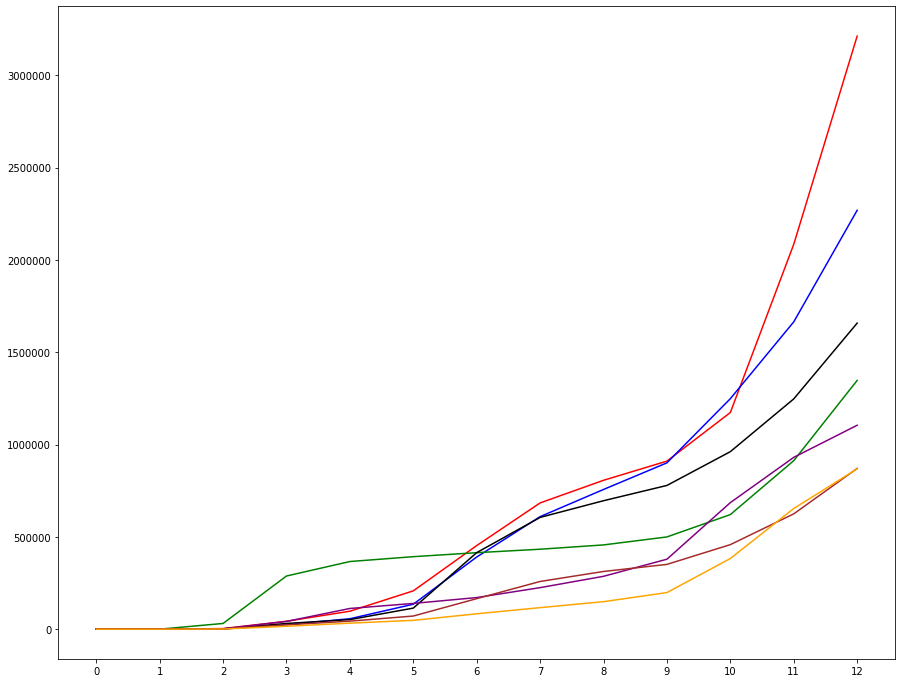

In [113]:
time = np.arange(0,13,1)
# california, = plt.plot(time, statecases, color="red", label="California")
label_state = ['California','Texas','New York','Florida','Illinois','Georgia','Ohio']
colors = ['red','blue','green','black','purple','brown','orange']

plt.figure(figsize=(15, 12))
plt.locator_params(axis="x", nbins=14)

for i in range(0, len(top7state_array)):
    display(plt.plot(time, top7state_array[i], color=colors[i], label=label_state[i]))

In [28]:
# Checking If Every Format Is The Same For Each County 
# only_yuba = all_of_cali.loc[all_of_cali['county'] == 'Yuba']
# only_yuba

In [29]:
# Checking If Group By Syntax Was True 
only_cali_df = clean_recent_counties_df.loc[clean_recent_counties_df['state'] == 'California']
only_cali_df['cases'].sum()

3631320

In [30]:
san_diego_df = us_counties_df.loc[us_counties_df['county'] == 'San Diego']
san_diego_df

,fips,county,state,lat,long,date,cases,state_code,deaths
97672,6073.0,San Diego,California,33.034846,-116.736533,2020-01-22,0,CA,0
97673,6073.0,San Diego,California,33.034846,-116.736533,2020-01-23,0,CA,0
97674,6073.0,San Diego,California,33.034846,-116.736533,2020-01-24,0,CA,0
97675,6073.0,San Diego,California,33.034846,-116.736533,2020-01-25,0,CA,0
97676,6073.0,San Diego,California,33.034846,-116.736533,2020-01-26,0,CA,0
...,...,...,...,...,...,...,...,...,...
98088,6073.0,San Diego,California,33.034846,-116.736533,2021-03-13,265273,CA,3444
98089,6073.0,San Diego,California,33.034846,-116.736533,2021-03-14,265471,CA,3452
98090,6073.0,San Diego,California,33.034846,-116.736533,2021-03-15,265649,CA,3452
98091,6073.0,San Diego,California,33.034846,-116.736533,2021-03-16,265906,CA,3462


In [31]:
only_texas_df =  clean_recent_counties_df.loc[clean_recent_counties_df['state'] == 'Texas']
only_texas_df

,fips,county,state,lat,long,date,cases,state_code,deaths
1136278,48001.0,Anderson,Texas,31.815347,-95.653548,2021-03-17,6089,TX,112
1136699,48003.0,Andrews,Texas,32.304686,-102.637655,2021-03-17,1710,TX,47
1137120,48005.0,Angelina,Texas,31.254573,-94.609015,2021-03-17,8051,TX,267
1137541,48007.0,Aransas,Texas,28.105562,-96.999505,2021-03-17,1166,TX,35
1137962,48009.0,Archer,Texas,33.615700,-98.687546,2021-03-17,786,TX,12
...,...,...,...,...,...,...,...,...,...
1241949,48499.0,Wood,Texas,32.787224,-95.382364,2021-03-17,3300,TX,119
1242370,48501.0,Yoakum,Texas,33.173202,-102.827643,2021-03-17,863,TX,27
1242791,48503.0,Young,Texas,33.176597,-98.687909,2021-03-17,2128,TX,43
1243212,48505.0,Zapata,Texas,27.001564,-99.169872,2021-03-17,1754,TX,29


In [32]:
only_cali_df.count()

fips          58
county        58
state         58
lat           58
long          58
date          58
cases         58
state_code    58
deaths        58
dtype: int64

In [33]:
group_state_df = clean_recent_counties_df.groupby('state')['cases'].sum()
group_state_df

state
Alabama            509476
Alaska              60864
Arizona            834323
Arkansas           327781
California        3631320
Colorado           445338
Connecticut        294328
Delaware            91123
Florida           1989024
Georgia           1038550
Hawaii              28709
Idaho              176461
Illinois          1213668
Indiana            674430
Iowa               344267
Kansas             301063
Kentucky           418372
Louisiana          439002
Maine               47591
Maryland           395633
Massachusetts      604272
Michigan           654579
Minnesota          499962
Mississippi        301602
Missouri           530808
Montana            102484
Nebraska           205214
Nevada             300118
New Hampshire       79367
New Jersey         848727
New Mexico         188907
New York          1761775
North Carolina     889310
North Dakota       101284
Ohio               993681
Oklahoma           432793
Oregon             160288
Pennsylvania       976442
Rhode 

In [34]:
count_state_df = clean_recent_counties_df.groupby('state')['cases'].count().sort_values(ascending=False)
count_state_df

state
Texas             254
Georgia           161
Virginia          133
Kentucky          121
Missouri          115
Kansas            105
Illinois          103
North Carolina    101
Iowa              100
Tennessee          97
Nebraska           94
Indiana            92
Ohio               88
Minnesota          88
Michigan           85
Mississippi        82
Oklahoma           78
Arkansas           76
Wisconsin          72
Florida            68
Alabama            67
Pennsylvania       67
South Dakota       66
Louisiana          65
Colorado           65
New York           63
California         58
Montana            56
West Virginia      55
North Dakota       53
South Carolina     46
Idaho              44
Washington         40
Oregon             36
New Mexico         34
Alaska             28
Maryland           24
Wyoming            23
New Jersey         22
Nevada             17
Maine              17
Arizona            16
Vermont            15
Massachusetts      13
New Hampshire      11
Conn

In [35]:
group_state_series = clean_recent_counties_df.groupby('state')['cases'].sum().sort_values(ascending=False)
group_state_series

state
California        3631320
Texas             2742274
Florida           1989024
New York          1761775
Illinois          1213668
Georgia           1038550
Ohio               993681
Pennsylvania       976442
North Carolina     889310
New Jersey         848727
Arizona            834323
Tennessee          795963
Indiana            674430
Michigan           654579
Wisconsin          627060
Massachusetts      604272
Virginia           598468
South Carolina     536100
Missouri           530808
Alabama            509476
Minnesota          499962
Colorado           445338
Louisiana          439002
Oklahoma           432793
Kentucky           418372
Maryland           395633
Washington         352012
Iowa               344267
Arkansas           327781
Mississippi        301602
Kansas             301063
Nevada             300118
Connecticut        294328
Utah               288099
Nebraska           205214
New Mexico         188907
Idaho              176461
Oregon             160288
West V

In [36]:
group_states_df = pd.DataFrame(group_state_series)
group_states_df

,cases
state,
California,3631320
Texas,2742274
Florida,1989024
New York,1761775
Illinois,1213668
Georgia,1038550
Ohio,993681
Pennsylvania,976442
North Carolina,889310


In [37]:
group_states_df['cases'] = pd.to_numeric(group_states_df['cases'])
group_states_df['cases'].sum()

29288951

In [77]:
unemployment_df = pd.read_csv('Resources/unemploymentstates.csv')

In [78]:
unemployment_df

,State,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021,Unnamed: 74
0,Alabama,6.1,6.1,6.1,6.1,6.1,6.2,6.2,6.2,6.1,...,7.9,7.7,7.4,7.1,6.7,4.7,4.7,4.7,4.3,NaN
1,Alaska,6.2,6.3,6.3,6.3,6.3,6.3,6.2,6.2,6.2,...,11.6,11.3,11.0,7.2,7.0,6.5,6.5,6.5,6.6,NaN
2,Arizona,6.4,6.3,6.2,6.2,6.1,6.1,6.1,6.0,6.0,...,10.6,10.7,10.4,7.0,6.9,6.8,6.8,6.8,6.7,NaN
3,Arkansas,5.5,5.4,5.4,5.3,5.2,5.1,4.9,4.8,4.6,...,8.5,7.8,7.1,6.5,5.9,5.6,5.3,4.9,4.6,NaN
4,California,6.8,6.7,6.6,6.5,6.4,6.3,6.2,6.0,5.9,...,15.6,14.1,13.2,12.3,10.6,9.8,8.7,9.3,9.0,NaN
5,Colorado,4.1,4.1,4.1,4.0,3.9,3.8,3.7,3.6,3.5,...,11.6,11.3,7.4,7.1,7.0,6.9,6.9,6.9,6.6,NaN
6,Connecticut,6.0,5.9,5.8,5.8,5.7,5.6,5.6,5.5,5.4,...,11.4,11.4,11.3,8.4,8.3,8.2,8.2,8.2,8.1,NaN
7,Delaware,5.0,4.9,4.9,4.9,4.9,4.8,4.8,4.7,4.7,...,13.3,12.9,8.3,7.9,7.6,5.7,5.8,5.9,6.0,NaN
8,District of Columbia,7.4,7.3,7.2,7.2,7.0,6.9,6.8,6.8,6.7,...,8.9,8.9,8.9,8.8,8.7,8.8,8.8,8.8,8.4,NaN
9,Florida,5.9,5.8,5.8,5.7,5.7,5.6,5.5,5.4,5.3,...,14.2,11.6,11.5,7.9,7.2,5.8,5.4,5.1,4.8,NaN


In [84]:
unemployment_df = unemployment_df.drop(columns = 'Unnamed: 74')

In [85]:
top7covidstateunemployed = pd.DataFrame()

for i in range(0, len(label_state)):
    staterow = unemployment_df.loc[unemployment_df['State'] == label_state[i]]
    # https://pythonexamples.org/pandas-dataframe-add-append-row/
    top7covidstateunemployed = top7covidstateunemployed.append(staterow) 

In [86]:
top7covidstateunemployed

,State,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021
4,California,6.8,6.7,6.6,6.5,6.4,6.3,6.2,6.0,5.9,...,16.0,15.6,14.1,13.2,12.3,10.6,9.8,8.7,9.3,9.0
43,Texas,4.6,4.5,4.5,4.5,4.4,4.4,4.4,4.5,4.5,...,12.9,11.6,10.2,9.3,6.9,7.9,7.3,7.2,6.9,6.8
32,New York,5.7,5.6,5.6,5.5,5.4,5.3,5.2,5.0,4.9,...,16.2,15.7,15.0,14.7,11.7,10.0,8.7,8.7,8.7,8.8
9,Florida,5.9,5.8,5.8,5.7,5.7,5.6,5.5,5.4,5.3,...,14.0,14.2,11.6,11.5,7.9,7.2,5.8,5.4,5.1,4.8
13,Illinois,6.1,6.1,6.0,6.0,6.0,6.0,5.9,5.9,5.9,...,16.5,15.4,14.2,12.0,11.1,10.4,8.1,8.1,8.0,7.7
10,Georgia,6.5,6.4,6.3,6.3,6.2,6.1,6.0,5.9,5.9,...,12.5,9.4,8.4,7.6,7.0,6.5,5.9,5.6,5.3,5.1
35,Ohio,5.2,5.2,5.2,5.1,5.0,4.9,4.8,4.8,4.7,...,16.4,14.9,10.3,9.3,9.0,7.4,5.6,5.6,5.6,5.3


In [91]:
clean_7_covidstates_df = top7covidstateunemployed.drop(top7covidstateunemployed.loc[:, 'January 2015':'December 2019'], axis = 1)

In [94]:
rotate_7_covidstates = clean_7_covidstates_df.T

In [96]:
rotate_7_covidstates.columns = ['California','Texas','New York','Florida','Illinois','Georgia','Ohio']

In [99]:
top_7_covid_states_unemployed = rotate_7_covidstates.drop('State')

In [100]:
top_7_covid_states_unemployed

,California,Texas,New York,Florida,Illinois,Georgia,Ohio
January 2020,4.2,3.6,3.8,3.3,3.5,3.3,4.5
February 2020,4.3,3.7,3.9,3.3,3.6,3.5,4.7
March 2020,4.5,4.9,3.9,4.9,3.7,3.6,4.9
April 2020,16.0,12.9,16.2,14.0,16.5,12.5,16.4
May 2020,15.6,11.6,15.7,14.2,15.4,9.4,14.9
June 2020,14.1,10.2,15,11.6,14.2,8.4,10.3
July 2020,13.2,9.3,14.7,11.5,12,7.6,9.3
August 2020,12.3,6.9,11.7,7.9,11.1,7,9
September 2020,10.6,7.9,10,7.2,10.4,6.5,7.4
October 2020,9.8,7.3,8.7,5.8,8.1,5.9,5.6


In [ ]:
# create csv file 

In [104]:
unemployment_array = []
for i in range(0, len(label_state)):
    state_array = top_7_covid_states_unemployed[label_state[i]].to_numpy()
    unemployment_array.append(state_array)

In [105]:
unemployment_array

[array([4.2, 4.3, '4.5', '16.0', 15.6, 14.1, 13.2, 12.3, 10.6, 9.8, 8.7,
        9.3, 9.0], dtype=object),
 array([3.6, 3.7, '4.9', '12.9', 11.6, 10.2, 9.3, 6.9, 7.9, 7.3, 7.2, 6.9,
        6.8], dtype=object),
 array([3.8, 3.9, '3.9', '16.2', 15.7, 15.0, 14.7, 11.7, 10.0, 8.7, 8.7,
        8.7, 8.8], dtype=object),
 array([3.3, 3.3, '4.9', '14.0', 14.2, 11.6, 11.5, 7.9, 7.2, 5.8, 5.4, 5.1,
        4.8], dtype=object),
 array([3.5, 3.6, '3.7', '16.5', 15.4, 14.2, 12.0, 11.1, 10.4, 8.1, 8.1,
        8.0, 7.7], dtype=object),
 array([3.3, 3.5, '3.6', '12.5', 9.4, 8.4, 7.6, 7.0, 6.5, 5.9, 5.6, 5.3,
        5.1], dtype=object),
 array([4.5, 4.7, '4.9', '16.4', 14.9, 10.3, 9.3, 9.0, 7.4, 5.6, 5.6, 5.6,
        5.3], dtype=object)]

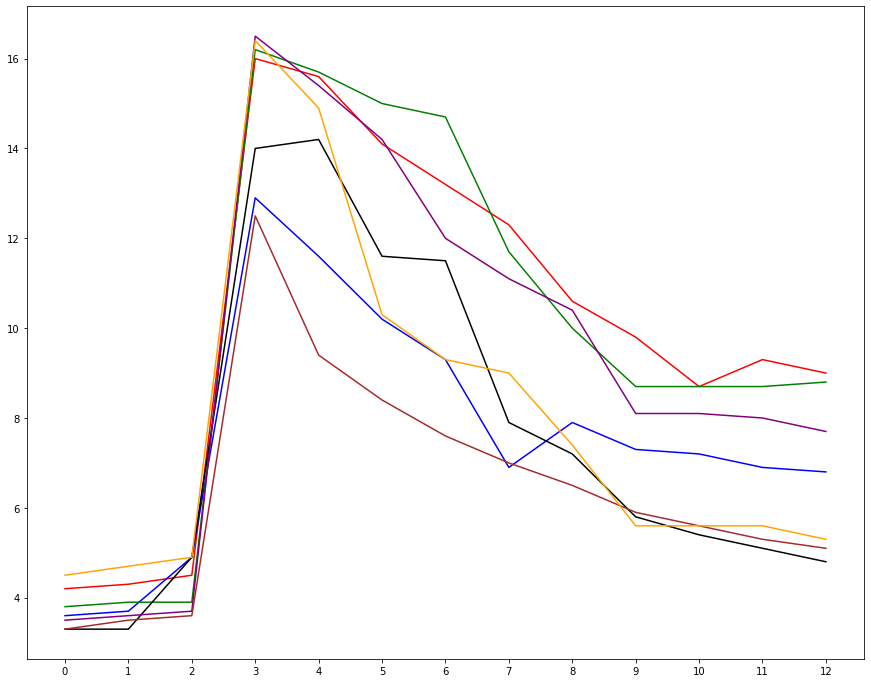

In [114]:
plt.figure(figsize=(15, 12))
plt.locator_params(axis="x", nbins=14)

for i in range(0, len(top7state_array)):
    display(plt.plot(time, unemployment_array[i], color=colors[i], label=label_state[i]))

In [ ]:
#Notes 
#histogram for California Counties 
#markers on map? 
#may display number of cases in califor